In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Import statements required for Plotly 
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls


from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, log_loss, classification_report)
from imblearn.over_sampling import SMOTE
import xgboost

# Import and suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
attrition = pd.read_csv('HR-Employee-Attrition.csv')
attrition = attrition.drop(["EmployeeCount", "Over18", "StandardHours", "EmployeeNumber", "MonthlyRate", "DailyRate", "HourlyRate"], axis=1)
attrition.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,Sales,1,2,Life Sciences,2,Female,3,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,3,Male,2,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,Research & Development,2,2,Other,4,Male,2,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,Research & Development,3,4,Life Sciences,4,Female,3,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,Research & Development,2,1,Medical,1,Male,3,...,3,4,1,6,3,3,2,2,2,2


In [4]:
#display(attrition.isnull().any())

In [5]:
attrition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   Department                1470 non-null   object
 4   DistanceFromHome          1470 non-null   int64 
 5   Education                 1470 non-null   int64 
 6   EducationField            1470 non-null   object
 7   EnvironmentSatisfaction   1470 non-null   int64 
 8   Gender                    1470 non-null   object
 9   JobInvolvement            1470 non-null   int64 
 10  JobLevel                  1470 non-null   int64 
 11  JobRole                   1470 non-null   object
 12  JobSatisfaction           1470 non-null   int64 
 13  MaritalStatus             1470 non-null   object
 14  MonthlyIncome           

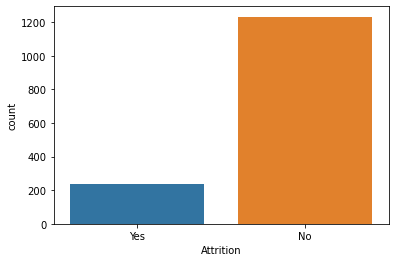

In [6]:
import seaborn as sns
#sns.set(style="darkgrid")
ax = sns.countplot(x="Attrition", data=attrition)

In [7]:
# # Plotting the KDEplots
# f, axes = plt.subplots(3, 3, figsize=(10, 8), 
#                        sharex=False, sharey=False)

# # Defining our colormap scheme
# s = np.linspace(0, 3, 10)
# cmap = sns.cubehelix_palette(start=0.0, light=1, as_cmap=True)

# # Generate and plot
# x = attrition['Age'].values
# y = attrition['TotalWorkingYears'].values
# sns.kdeplot(x, y, cmap=cmap, shade=True, cut=5, ax=axes[0,0])
# axes[0,0].set( title = 'Age against Total working years')

# cmap = sns.cubehelix_palette(start=0.333333333333, light=1, as_cmap=True)
# # Generate and plot
# x = attrition['Age'].values
# y = attrition['DailyRate'].values
# sns.kdeplot(x, y, cmap=cmap, shade=True, ax=axes[0,1])
# axes[0,1].set( title = 'Age against Daily Rate')

# cmap = sns.cubehelix_palette(start=0.666666666667, light=1, as_cmap=True)
# # Generate and plot
# x = attrition['YearsInCurrentRole'].values
# y = attrition['Age'].values
# sns.kdeplot(x, y, cmap=cmap, shade=True, ax=axes[0,2])
# axes[0,2].set( title = 'Years in role against Age')

# cmap = sns.cubehelix_palette(start=1.0, light=1, as_cmap=True)
# # Generate and plot
# x = attrition['DailyRate'].values
# y = attrition['DistanceFromHome'].values
# sns.kdeplot(x, y, cmap=cmap, shade=True,  ax=axes[1,0])
# axes[1,0].set( title = 'Daily Rate against DistancefromHome')

# cmap = sns.cubehelix_palette(start=1.333333333333, light=1, as_cmap=True)
# # Generate and plot
# x = attrition['DailyRate'].values
# y = attrition['JobSatisfaction'].values
# sns.kdeplot(x, y, cmap=cmap, shade=True,  ax=axes[1,1])
# axes[1,1].set( title = 'Daily Rate against Job satisfaction')

# cmap = sns.cubehelix_palette(start=1.666666666667, light=1, as_cmap=True)
# # Generate and plot
# x = attrition['YearsAtCompany'].values
# y = attrition['JobSatisfaction'].values
# sns.kdeplot(x, y, cmap=cmap, shade=True,  ax=axes[1,2])
# axes[1,2].set( title = 'Daily Rate against distance')

# cmap = sns.cubehelix_palette(start=2.0, light=1, as_cmap=True)
# # Generate and plot
# x = attrition['YearsAtCompany'].values
# y = attrition['DailyRate'].values
# sns.kdeplot(x, y, cmap=cmap, shade=True,  ax=axes[2,0])
# axes[2,0].set( title = 'Years at company against Daily Rate')

# cmap = sns.cubehelix_palette(start=2.333333333333, light=1, as_cmap=True)
# # Generate and plot
# x = attrition['RelationshipSatisfaction'].values
# y = attrition['YearsWithCurrManager'].values
# sns.kdeplot(x, y, cmap=cmap, shade=True,  ax=axes[2,1])
# axes[2,1].set( title = 'Relationship Satisfaction vs years with manager')

# cmap = sns.cubehelix_palette(start=2.666666666667, light=1, as_cmap=True)
# # Generate and plot
# x = attrition['WorkLifeBalance'].values
# y = attrition['JobSatisfaction'].values
# sns.kdeplot(x, y, cmap=cmap, shade=True,  ax=axes[2,2])
# axes[2,2].set( title = 'WorklifeBalance against Satisfaction')

# f.tight_layout()

In [8]:
# Define a dictionary for the target mapping
target_map = {'Yes':1, 'No':0}
# Use the pandas apply method to numerically encode our attrition target variable
attrition["Attrition_numerical"] = attrition["Attrition"].apply(lambda x: target_map[x])

In [9]:
# numerical = [
#     u'Age'
#     ,u'DailyRate'
#     ,u'DistanceFromHome'
#     ,u'Education'
#     ,u'EnvironmentSatisfaction'
#     ,u'HourlyRate'
#     ,u'JobInvolvement'
#     ,u'JobLevel'
#     ,u'JobSatisfaction'
#     ,u'MonthlyIncome'
#     ,u'MonthlyRate'
#     ,u'NumCompaniesWorked'
#     ,u'PercentSalaryHike'
#     ,u'PerformanceRating'
#     ,u'RelationshipSatisfaction'
#     ,u'StockOptionLevel'
#     ,u'TotalWorkingYears'
#     ,u'TrainingTimesLastYear'
#     ,u'WorkLifeBalance'
#     ,u'YearsAtCompany'
#     ,u'YearsInCurrentRole'
#     ,u'YearsSinceLastPromotion'
#     ,u'YearsWithCurrManager'
#     ,u'Attrition'
# ]

In [10]:
# Refining our list of numerical variables
numerical = [u'Age', u'DailyRate',  u'JobSatisfaction',
       u'MonthlyIncome', u'PerformanceRating',
        u'WorkLifeBalance', u'YearsAtCompany', u'Attrition_numerical']

# numerical = [u'Age', u'EnvironmentSatisfaction',  u'JobInvolvement',
#        u'JobSatisfaction', u'MonthlyIncome',
#         u'StockOptionLevel', u'YearsWithCurrManager', u'Attrition_numerical'
#             ,u'Gender'
#             ]


#g = sns.pairplot(attrition[numerical], hue='Attrition_numerical', palette='seismic', diag_kind = 'kde',diag_kws=dict(shade=True))
#g.set(xticklabels=[])

In [11]:
# Drop the Attrition_numerical column from attrition dataset first - Don't want to include that
attrition = attrition.drop(['Attrition_numerical'], axis=1)

# Empty list to store columns with categorical data
categorical = []
for col, value in attrition.iteritems():
    if value.dtype == 'object':
        categorical.append(col)

# Store the numerical columns in a list numerical
numerical = attrition.columns.difference(categorical)

In [12]:
# Store the categorical data in a dataframe called attrition_cat
attrition_cat = attrition[categorical]
attrition_cat = attrition_cat.drop(['Attrition'], axis=1) # Dropping the target column

In [13]:
attrition_cat = pd.get_dummies(attrition_cat)
attrition_cat.head(3)

,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,0,0,1,0,0,1,0,1,0,0,...,0,0,0,1,0,0,0,1,0,1
1,0,1,0,0,1,0,0,1,0,0,...,0,0,1,0,0,0,1,0,1,0
2,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1


In [14]:
# Store the numerical features to a dataframe attrition_num
attrition_num = attrition[numerical]

In [15]:
attrition_num

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,2,3,2,4,5993,8,11,3,1,0,8,0,1,6,4,0,5
1,49,8,1,3,2,2,2,5130,1,23,4,4,1,10,3,3,10,7,1,7
2,37,2,2,4,2,1,3,2090,6,15,3,2,0,7,3,3,0,0,0,0
3,33,3,4,4,3,1,3,2909,1,11,3,3,0,8,3,3,8,7,3,0
4,27,2,1,1,3,1,2,3468,9,12,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,23,2,3,4,2,4,2571,4,17,3,3,1,17,3,3,5,2,0,3
1466,39,6,1,4,2,3,1,9991,4,15,3,1,1,9,5,3,7,7,1,7
1467,27,4,3,2,4,2,2,6142,1,20,4,2,1,6,0,3,6,2,0,3
1468,49,2,3,4,2,2,2,5390,2,14,3,4,0,17,3,2,9,6,0,8


In [16]:
# attrition_num = attrition_num[['Age', 'DailyRate', 'JobSatisfaction',
#        'MonthlyIncome', 'PerformanceRating',
#         'WorkLifeBalance', 'YearsAtCompany']]

# attrition_num = attrition_num[['Age', 'EnvironmentSatisfaction',  'JobInvolvement', 'JobSatisfaction'
#  , 'MonthlyIncome','StockOptionLevel', 'YearsWithCurrManager'
#             ]]

In [17]:
# Concat the two dataframes together columnwise
attrition_final = pd.concat([attrition_num, attrition_cat], axis=1)

In [18]:
# Define a dictionary for the target mapping
target_map = {'Yes':1, 'No':0}
# Use the pandas apply method to numerically encode our attrition target variable
target = attrition["Attrition"].apply(lambda x: target_map[x])
target.head(3)

0    1
1    0
2    1
Name: Attrition, dtype: int64

In [19]:
# Import the train_test_split method
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

# Split data into train and test sets as well as for validation and testing
train, test, target_train, target_val = train_test_split(attrition_final, 
                                                         target, 
                                                         train_size= 0.80,
                                                         random_state=0);
#train, test, target_train, target_val = StratifiedShuffleSplit(attrition_final, target, random_state=0);

In [20]:
import imblearn
#oversampler = RandomOverSampler(sampling_strategy=0.5) #SMOTE(random_state=0)
oversampler = SMOTE(random_state=0)
smote_train, smote_target = oversampler.fit_resample(train,target_train)

In [21]:
seed = 0   # We set our random seed to zero for reproducibility
# Random Forest parameters
rf_params = {
    'n_jobs': -1,
    'n_estimators': 1000,
#     'warm_start': True, 
    'max_features': 0.3,
    'max_depth': 4,
    'min_samples_leaf': 2,
    'max_features' : 'sqrt',
    'random_state' : seed,
    'verbose': 0
}

In [22]:
from sklearn.feature_selection import RFE
rf = RandomForestClassifier(**rf_params)
#rf = RFE(rf, 40)
rf.fit(smote_train, smote_target)
print("Fitting of Random Forest finished")
rf_predictions = rf.predict(test)
print("Predictions finished")
print(classification_report(target_val, rf_predictions))

Fitting of Random Forest finished
Predictions finished
              precision    recall  f1-score   support

           0       0.89      0.93      0.91       245
           1       0.58      0.45      0.51        49

    accuracy                           0.85       294
   macro avg       0.74      0.69      0.71       294
weighted avg       0.84      0.85      0.85       294



In [23]:
print("Accuracy score: {}".format(accuracy_score(target_val, rf_predictions)))
print("="*80)
print(classification_report(target_val, rf_predictions))

Accuracy score: 0.8537414965986394
              precision    recall  f1-score   support

           0       0.89      0.93      0.91       245
           1       0.58      0.45      0.51        49

    accuracy                           0.85       294
   macro avg       0.74      0.69      0.71       294
weighted avg       0.84      0.85      0.85       294



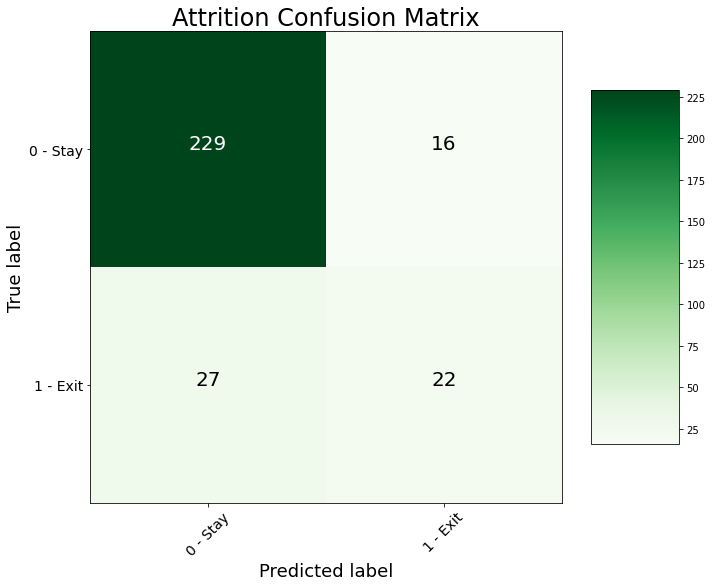

In [24]:
import itertools
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
def plot_confusion_matrix(cm, classes, normalize = False,
                          title='Confusion matrix',
                          cmap=plt.cm.Greens): # can change color 
    plt.figure(figsize = (10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 24)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 14)
    plt.yticks(tick_marks, classes, size = 14)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    # Label the plot
    for i, j in itertools.product(range(cm.shape[0]),   range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), 
                 fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        plt.grid(None)
        plt.tight_layout()
        plt.ylabel('True label', size = 18)
        plt.xlabel('Predicted label', size = 18)

# Let's plot it out
cm = confusion_matrix(target_val, rf_predictions)
plot_confusion_matrix(cm, classes = ['0 - Stay', '1 - Exit'],
                      title = 'Attrition Confusion Matrix')

In [25]:
# import matplotlib.pyplot as plt
# from sklearn.datasets import make_classification
# from sklearn.metrics import plot_confusion_matrix
# from sklearn.model_selection import train_test_split
# from sklearn.svm import SVC
# X, y = make_classification(random_state=0)
# X_train, X_test, y_train, y_test = train_test_split(
#         X, y, random_state=0)
# clf = SVC(random_state=0)
# clf.fit(X_train, y_train)
# SVC(random_state=0)
# plot_confusion_matrix(rf, X_test, y_test)  
# plt.show()

In [26]:
# Scatter plot 
trace = go.Scatter(
    y = rf.feature_importances_,
    x = attrition_final.columns.values,
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = 13,
        #size= rf.feature_importances_,
        #color = np.random.randn(500), #set color equal to a variable
        color = rf.feature_importances_,
        colorscale='Portland',
        showscale=True
    ),
    text = attrition_final.columns.values
)
data = [trace]

layout= go.Layout(
    autosize= True,
    title= 'Random Forest Feature Importance',
    hovermode= 'closest',
     xaxis= dict(
         ticklen= 5,
         showgrid=False,
        zeroline=False,
        showline=False
     ),
    yaxis=dict(
        title= 'Feature Importance',
        showgrid=False,
        zeroline=False,
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatter2010')

In [27]:
# import time
# import numpy as np
# feature_names = [f"feature {i}" for i in range(attrition_final.shape[1])]

# start_time = time.time()
# importances = rf.feature_importances_
# std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
# elapsed_time = time.time() - start_time

# print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

# import pandas as pd


# fig, ax = plt.subplots()
# forest_importances.plot.bar(yerr=std, ax=ax)
# ax.set_title("Feature importances using MDI")
# ax.set_ylabel("Mean decrease in impurity")
# fig.tight_layout()

In [28]:
# sorted_idx = rf.feature_importances_.argsort()
# importances = rf.feature_importances_
# forest_importances = pd.Series(importances, index=feature_names)
# plt.barh(attrition_final.feature_names[sorted_idx], rf.feature_importances_[sorted_idx])
# plt.xlabel("Random Forest Feature Importance")


In [29]:
for name, importance in zip(attrition_final.columns, rf.feature_importances_):
    print(name, "=", importance)

Age = 0.022839174235853334
DistanceFromHome = 0.007656056385340319
Education = 0.009414895679941944
EnvironmentSatisfaction = 0.041213554349949964
JobInvolvement = 0.028888237749629224
JobLevel = 0.048001640915229085
JobSatisfaction = 0.04851049332240758
MonthlyIncome = 0.059505443663634354
NumCompaniesWorked = 0.0036484139170729272
PercentSalaryHike = 0.00314848222573315
PerformanceRating = 0.0013740808059987432
RelationshipSatisfaction = 0.011659321815133461
StockOptionLevel = 0.06174014211613768
TotalWorkingYears = 0.031139110130261077
TrainingTimesLastYear = 0.009943374689085589
WorkLifeBalance = 0.020637514481016184
YearsAtCompany = 0.03001103171257697
YearsInCurrentRole = 0.03394603421157781
YearsSinceLastPromotion = 0.002889320214451139
YearsWithCurrManager = 0.02879531669939546
BusinessTravel_Non-Travel = 0.007114044791885016
BusinessTravel_Travel_Frequently = 0.001302303505488866
BusinessTravel_Travel_Rarely = 0.009551469176691975
Department_Human Resources = 0.001920415979857

### Logistic Regression with SMOTE

In [30]:
X_train = train
y_train = target_train
X_test = test
y_test = target_val

In [31]:
smt = SMOTE(random_state=0, sampling_strategy = 0.4)
X_train_SMOTE, y_train_SMOTE = smt.fit_resample(X_train, y_train)

In [38]:
from sklearn.feature_selection import RFE
log_reg_model = LogisticRegression(max_iter=1000, solver = "newton-cg")
rfe = RFE(log_reg_model, 45)
#log_reg_model = rfe
log_reg_model.fit(X_train_SMOTE, y_train_SMOTE)
y_pred = log_reg_model.predict(X_test)
print("Model accruracy score: {}".format(accuracy_score(y_test, y_pred)))
print(classification_report(y_test, y_pred))
s = confusion_matrix(target_val, y_pred)
plot_confusion_matrix(s, classes = ['0 - Stay', '1 - Exit'],
                      title = 'Attrition Confusion Matrix')

TypeError: __init__() takes 2 positional arguments but 3 were given

In [34]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

log_reg_model = LogisticRegression(max_iter=1000, solver = "newton-cg")
log_reg_model = RFE(log_reg_model, 45) # using RFE to get the top 45 most important features
log_reg_model.fit(X_train_SMOTE, y_train_SMOTE) # fitting data
y_pred = log_reg_model.predict(X_test)
print("Model accruracy score: {}".format(accuracy_score(y_test, y_pred)))
print(classification_report(y_test, y_pred))

TypeError: __init__() takes 2 positional arguments but 3 were given

In [35]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import shap

log_reg_model = LogisticRegression(max_iter=1000, solver = "newton-cg")
log_reg_model = RFE(log_reg_model, 45) # using RFE to get the top 45 most important features
log_reg_model.fit(X_train_SMOTE, y_train_SMOTE) # fitting data
y_pred = log_reg_model.predict(X_test)
print("Model accruracy score: {}".format(accuracy_score(y_test, y_pred)))
print(classification_report(y_test, y_pred))

explainer = shap.LinearExplainer(log_reg_model, X_train_SMOTE)
shap_values = explainer.shap_values(X_test[:150])

shap.summary_plot(shap_values, feature_names = X_train_SMOTE.columns)

ModuleNotFoundError: No module named 'shap'

In [36]:
import numpy as np    
from sklearn.linear_model import LogisticRegression

x1 = np.random.randn(100)
x2 = 4*np.random.randn(100)
x3 = 0.5*np.random.randn(100)
y = (3 + x1 + x2 + x3 + 0.2*np.random.randn()) > 0
X = np.column_stack([x1, x2, x3])

m = log_reg_model
m.fit(X, y)

# The estimated coefficients will all be around 1:
print(m.coef_)

# Those values, however, will show that the second parameter
# is more influential
print(np.std(X, 0)*m.coef_)

m.fit(X / np.std(X, 0), y)
print(m.coef_)

[[0.80590764 2.03029054 0.8443153 ]]
[[0.82530961 7.56842801 0.40502727]]
[[0.58049259 3.2916379  0.3683612 ]]


In [ ]:
log_reg_model.coef_